In [17]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.13.1'

In [22]:
torch.randn(1)

tensor([-1.4398])

# Create some data

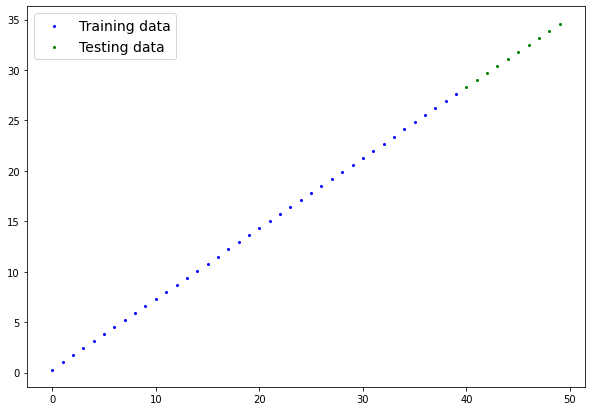

In [21]:
plot_predictions()

In [10]:
# linear regression
# Y = mX + b
# Y is the dependent variable, X is the independent variable, m is the slope, b is the intercept
# weight = m, also known as the gradient
# bias = b, also known as the backpropagation

# known parameters
weight = 0.7
bias = 0.3

# created data
X = torch.arange(0, 50, step=1).unsqueeze(dim=1).float()
y = weight * X + bias

display(X[:5], X.shape, X.ndim)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])

torch.Size([50, 1])

2

In [11]:
# The model will try to learn what these values are
display(y[:5], y.shape, y.ndim)

tensor([[0.3000],
        [1.0000],
        [1.7000],
        [2.4000],
        [3.1000]])

torch.Size([50, 1])

2

# Split to test and train data

In [14]:
# train on 40 samples to predict the next 10 samples
train_split = 40
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [19]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})
    plt.show()


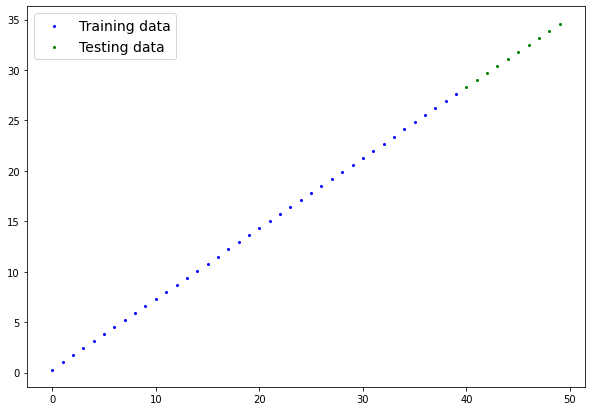

In [20]:
plot_predictions()

# Create a LinearRegressionModel model

In [23]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        :param x: the input/training data
        :return:
        """

        # the linear regression formula
        return self.weights  * x + self.bias

In [25]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [27]:
display(X_test)
display(y_test)

tensor([[40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.]])

tensor([[28.3000],
        [29.0000],
        [29.7000],
        [30.4000],
        [31.1000],
        [31.8000],
        [32.5000],
        [33.2000],
        [33.9000],
        [34.6000]])

In [29]:
with torch.inference_mode():
    y_predictions = model_0(X_test)

y_predictions

tensor([[13.5964],
        [13.9331],
        [14.2698],
        [14.6065],
        [14.9432],
        [15.2799],
        [15.6166],
        [15.9533],
        [16.2899],
        [16.6266]])

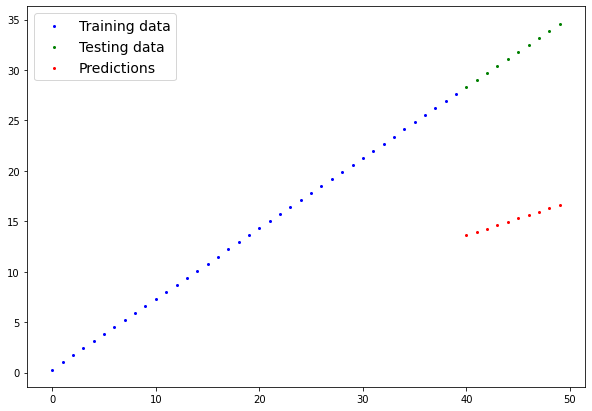

In [30]:
plot_predictions(predictions=y_predictions)

# Create a loss & optim function

In [32]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# Train the model

In [33]:
epochs = 1

for epoch in range(epochs):
    # set model to train mode
    model_0.train()

    # 1. forward pass
    y_pred = model_0(X_train)

    # 2. calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. optimize weights
    optimizer.zero_grad()

    # 4. perform backpropagation
    loss.backward()

    # 5. gradient descent
    optimizer.step()

    # turn off gradient tracking
    #model_0.eval()

display(model_0.state_dict())

OrderedDict([('weights', tensor([0.5317])), ('bias', tensor([0.1388]))])

# Test the model